In [1]:
# DataSet: https://www.kaggle.com/camnugent/sandp500


from google.colab import files
doc = files.upload()

Saving all_stocks_5yr.csv to all_stocks_5yr.csv


In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import utils
from fbprophet import Prophet


In [226]:
df= pd.read_csv("all_stocks_5yr.csv")

df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [227]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [228]:
df.Name.value_counts()

ARNC     1259
PHM      1259
COF      1259
DLR      1259
CTL      1259
ABBV     1259
DISCK    1259
SWK      1259
AEP      1259
KMX      1259
CERN     1259
INTU     1259
VLO      1259
GGP      1259
KLAC     1259
LKQ      1259
PNC      1259
ROST     1259
VMC      1259
XYL      1259
PPG      1259
ANTM     1259
PEG      1259
PXD      1259
NCLH     1259
LUK      1259
TEL      1259
LYB      1259
STT      1259
SNI      1259
         ... 
O        1243
IQV      1197
COTY     1173
FOX      1169
FOXA     1169
NWSA     1169
NWS      1169
ALLE     1063
GOOG      975
NAVI      960
INFO      917
SYF       888
CFG       850
QRVO      781
WRK       662
KHC       655
PYPL      655
HPQ       581
HPE       581
CSRA      561
WLTW      528
UA        464
FTV       404
EVHC      297
HLT       276
DXC       215
BHGE      152
BHF       143
DWDP      109
APTV       44
Name: Name, Length: 505, dtype: int64

# Amazon data

In [0]:

amazon = df.loc[df['Name']=='AMZN']
amazon.head(5)
amzn_df = amazon

In [230]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [231]:
amazon.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0, 0.5, 'Close')

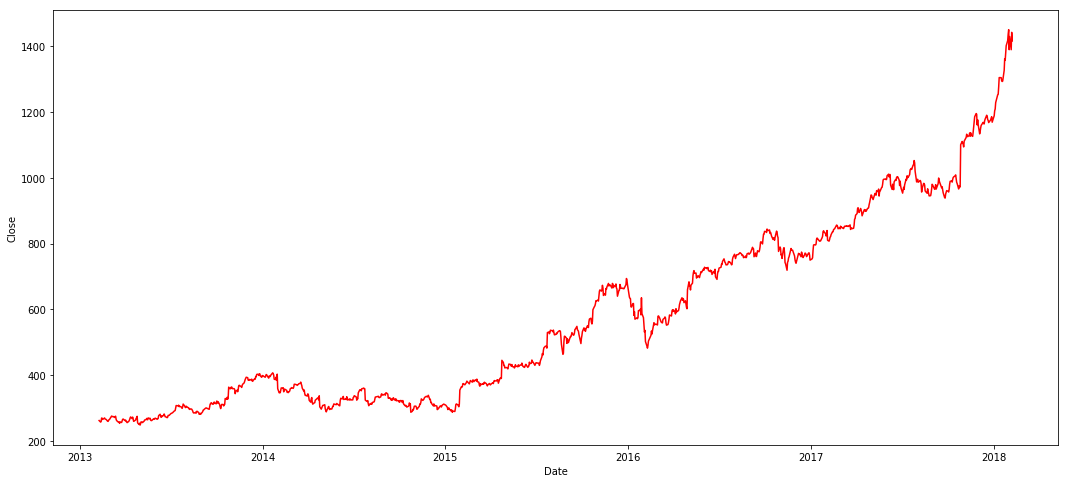

In [234]:

amazon.loc[:, 'date'] = pd.to_datetime(amazon.loc[:,'date'], format="%Y/%m/%d")

plt.figure(figsize=(18,8))
plt.plot(amazon['date'],amazon['close'],color = 'red')
plt.xlabel('Date')
plt.ylabel('Close')



Text(0, 0.5, 'Volume (X10000000)')

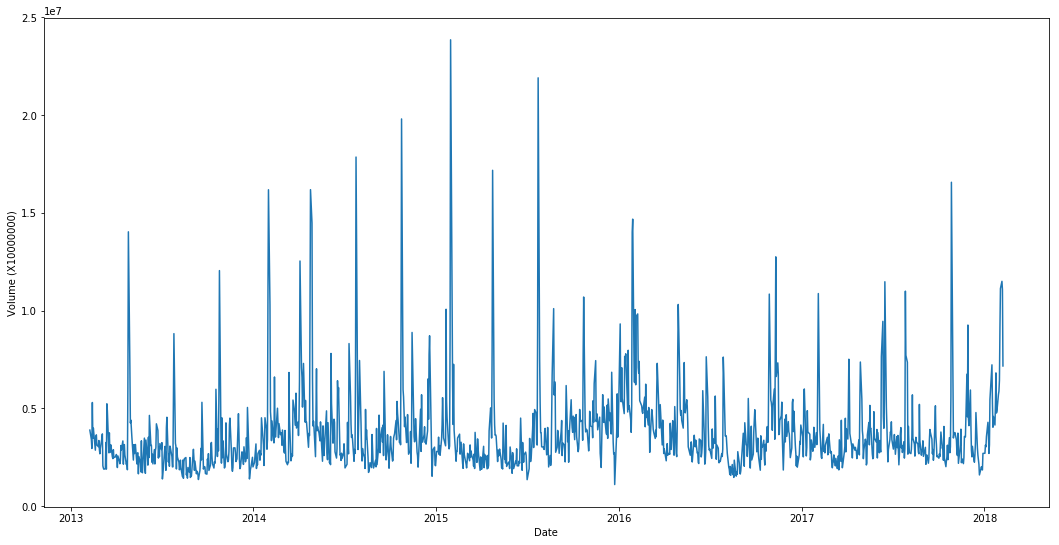

In [235]:
plt.figure(figsize = (18,9))
plt.plot(amazon['date'],amazon['volume'])
plt.xlabel('Date')
plt.ylabel('Volume (X10000000)')


In [0]:
amazon['HL_percentage'] = (amazon['high']-amazon['low'])/amazon['low']*100
amazon['percentage_change'] = (amazon['close']-amazon['open'])/amazon['open']*100

amazon_df = amazon[['HL_percentage', 'percentage_change', 'close', 'volume']]

In [239]:
amazon_df.dropna( inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



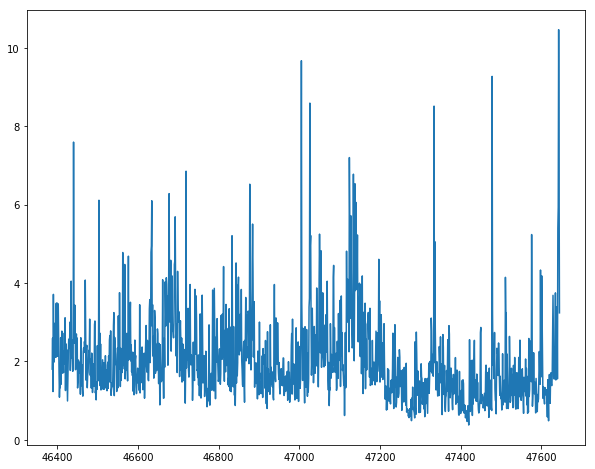

In [240]:

plt.figure(figsize = (10,8))
plt.plot(amazon_df['HL_percentage'])

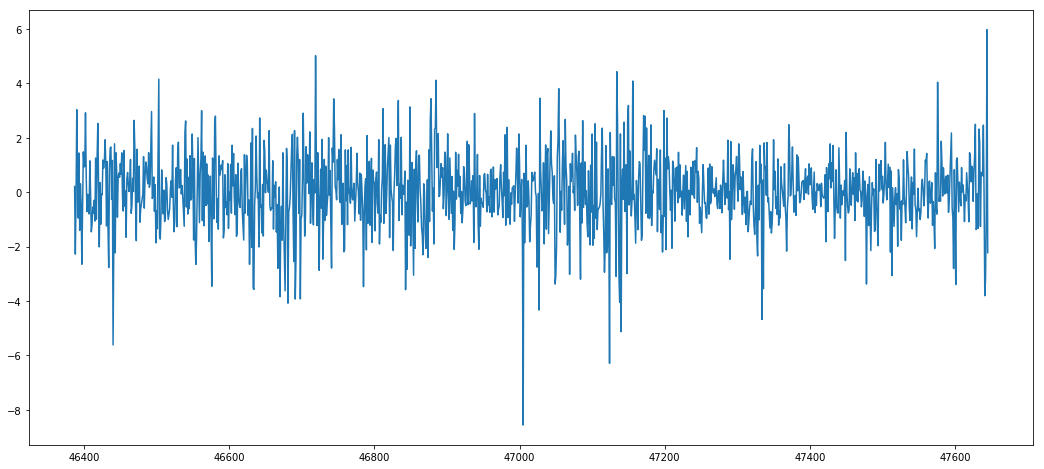

In [241]:
plt.figure(figsize = (18,8))
plt.plot(amazon_df['percentage_change'], data=df)

In [243]:
forcast_col = 'close'

forcast_out = int(math.ceil(0.1*len(forcast_col)))



amazon_df['label'] = amazon_df[forcast_col].shift(forcast_out)
amazon_df.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['HL_percentage', 'percentage_change', 'close', 'volume', 'label'], dtype='object')

In [246]:
amazon_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [247]:
amazon_df.columns

Index(['HL_percentage', 'percentage_change', 'close', 'volume', 'label'], dtype='object')

In [248]:
amazon_df.isnull().values.any()

False

In [0]:
X = np.array(amazon_df.drop(['label'],1))
y = np.array(amazon_df['label'])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [252]:
len(X_train),len(y_train)

(1006, 1006)

In [253]:
len(X_test),len(y_test)

(252, 252)

# LinearRegression

In [259]:
clf = LinearRegression()

clf.fit(X_train,y_train)

score1 = clf1.score(X_test, y_test)
score1

-0.1311375729233526

# DecisionTreeRegressor

In [260]:
clf2 = DecisionTreeRegressor()

clf2.fit(X_train,y_train)

score2 = clf2.score(X_test, y_test)
score2

0.9987414948785007

# RandomForestRegressor


In [266]:
clf3 = RandomForestRegressor()

clf3.fit(X_train,y_train)

score3 = clf3.score(X_test, y_test)
score3

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



0.9990982344804303

# KNeighborsRegressor

In [257]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))


[681 916 737 ... 310 723  47]
continuous
multiclass
multiclass


In [267]:
clf4 = KNeighborsRegressor()

clf4.fit(X_train,y_train)

score4 = clf4.score(X_test,y_test)
score4

-0.1311375729233526

# *Facebook Classifier*

In [263]:
fb_df = amzn_df.drop(['open', 'high', 'low','volume','Name'], axis=1)
fb_df.rename(columns={'close':'y','date':'ds'},inplace=True)
fb_df.head()

,ds,y,HL_percentage,percentage_change
46387,2013-02-08,261.95,1.801923,0.210406
46388,2013-02-11,257.21,2.591582,-2.275836
46389,2013-02-12,258.70,1.229572,-0.189051
46390,2013-02-13,269.47,3.711103,3.035981
46391,2013-02-14,269.24,1.978146,0.699405


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(53.625, 0.5, 'Close Price')

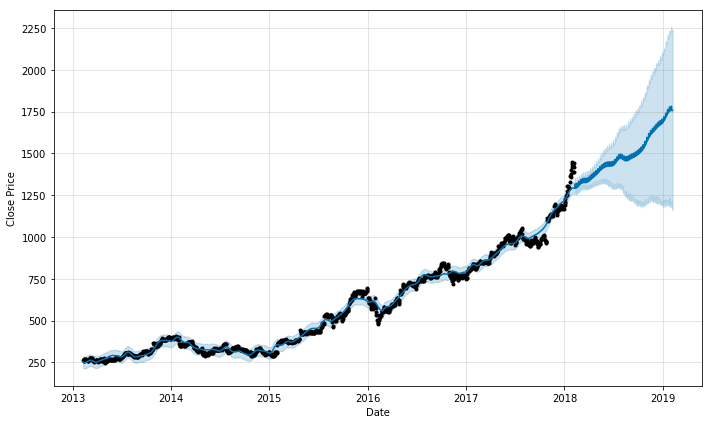

In [264]:
m = Prophet()

m.fit(fb_df)


future_price = m.make_future_dataframe(periods = 365)


forcast = m.predict(future_price)


fig = m.plot(forcast)
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price")

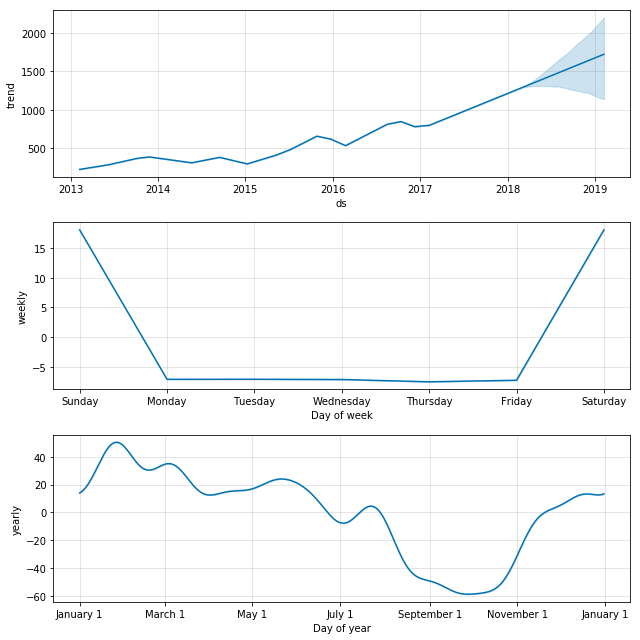

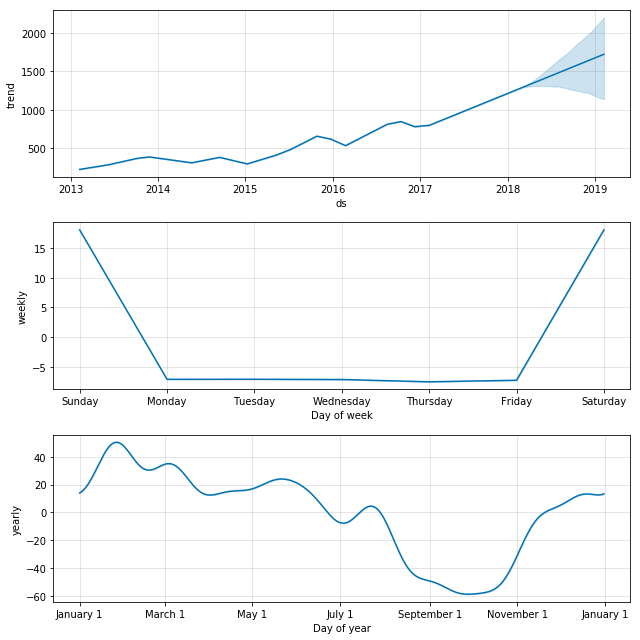

In [265]:
m.plot_components(forcast)